<a href="https://www.kaggle.com/code/kiranpathak97/bellabeat-case-study?scriptVersionId=140850226" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# How Can a Wellness Technology Company Play It Smart?

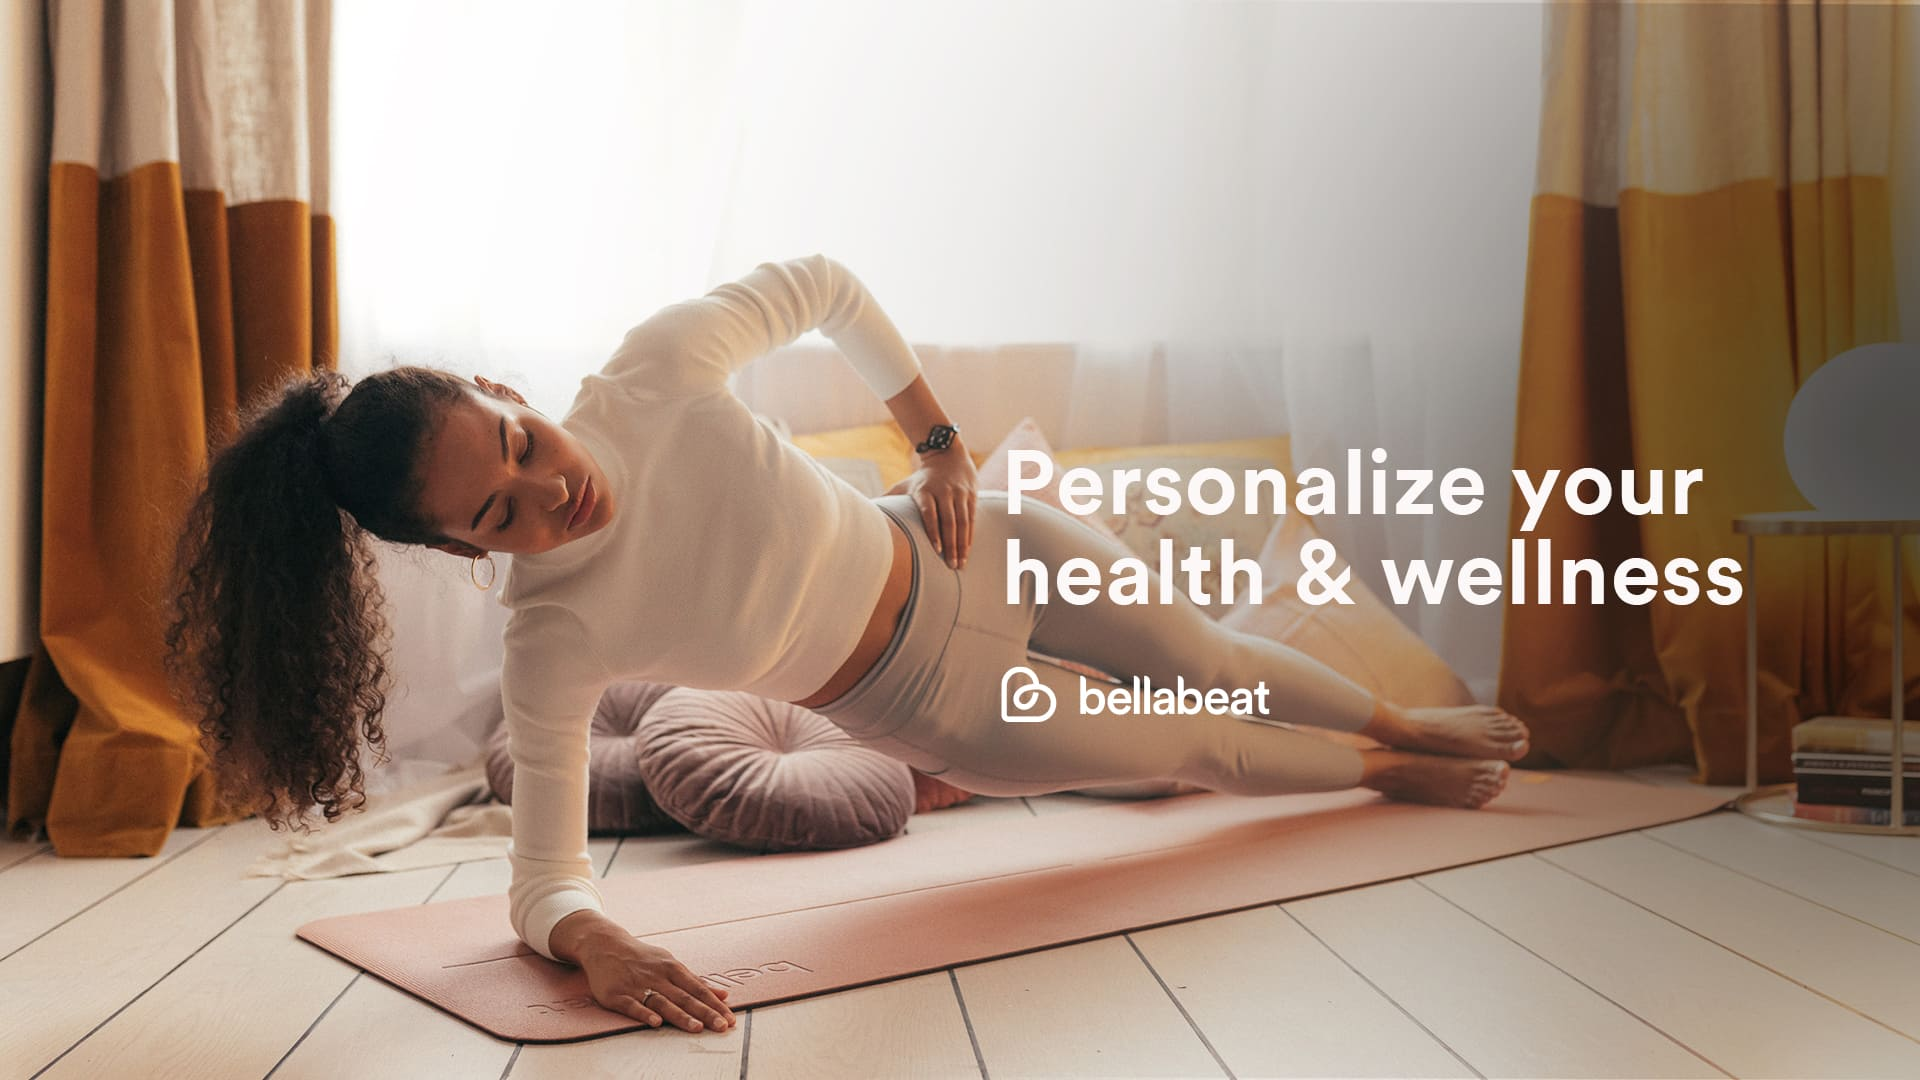

#### About Company

Bellabeat, a high-tech manufacturer of health-focused smart products for women. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

# Phase 1: Ask

These questions can guide analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**1.1 Business task**

Identify potential opportunities for growth and share recommendations for the Bellabeat's marketing strategy based on trends and insights discovered.

# Phase 2: Prepare

* Fitness Tracker Data: [here](http://https://www.kaggle.com/datasets/arashnic/fitbit)
* The data has been made available by [Mobius](http://https://www.kaggle.com/arashnic).
* The data is in CSV format.
* Limitations of Data: Data is available for 30 users only.

**Install packages**

In [1]:
library(tidyverse) #for data import and wrangling
library(lubridate) #date functions
library(ggplot2) #data visualizations

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**Import data**

In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

In [3]:
#Inspect the dataframes and look for incongruencies

head(activity)

# head(calories)
# head(intensities)
# head(sleep)
# head(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


# Phase 3: Process

In [4]:
# Convert date time format and add columns date and time.

# activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

# calories
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")

# transform intensities data
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")

# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

In [5]:
# Explore data

n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

Participants insights:
- 33 participants in the activity, calories and intensities data sets.
- 24 participants in the sleep and only 
- 8 participants in the weight data set. 

8 participants is not significant to make any recommendations and conclusions based on this data.

# Phase 4: Analyze

In [6]:
#statistical summary of data

# activity
activity %>%  
  select(TotalSteps,TotalDistance,SedentaryMinutes, Calories) %>%
  summary()

# explore num of active minutes per category
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
calories %>%
  select(Calories) %>%
  summary()

# sleep
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# weight
weight %>%
  select(WeightKg, BMI) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

    WeightKg           BMI       
 Min.   : 52.60   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:23.96  
 Median : 62.50   Median :24.39  
 Mean   : 72.04   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:25.56  
 Max.   :133.50   Max.   :47.54  

Insights from the summary:

- The average duration of sedentary behavior amounts to 991 minutes, equivalent to about 16 hours. There is a clear need for reduction in this prolonged inactivity.

- On the average, participants sleep for 7 hours.

- Average total steps per day are 7638. (Some research suggests that taking around 8,000 to 12,000 steps per day can provide substantial health benefits, including reducing the risk of chronic diseases.)

# Phase 5: Share

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


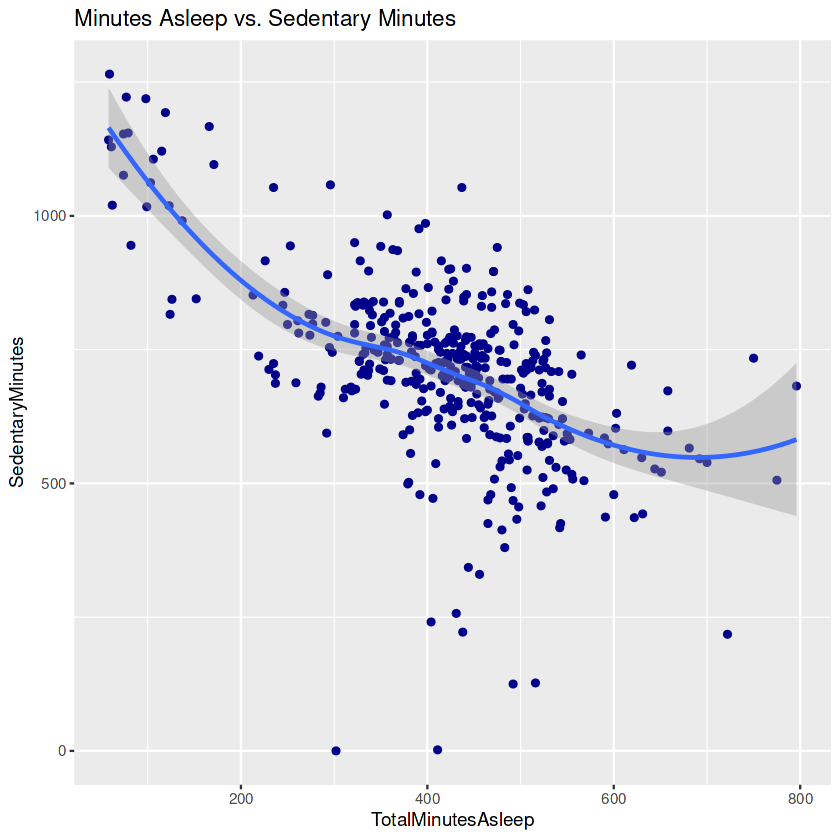

In [7]:
#merge activity and sleep dataset on columns Id and date 

merge_sleep_activity <- merge(sleep, activity, by=c('Id', 'date'))

#visualization: relationship between Total Minutes Asleep and Sedentry Minutes.

ggplot(data=merge_sleep_activity, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point(color='darkblue') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

It seems that there is negative correlation between sedentary minutes and sleep time. Spending more time in sedentary activities is linked to having less sleep. In other words, when people are less active, they are getting less sleep.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


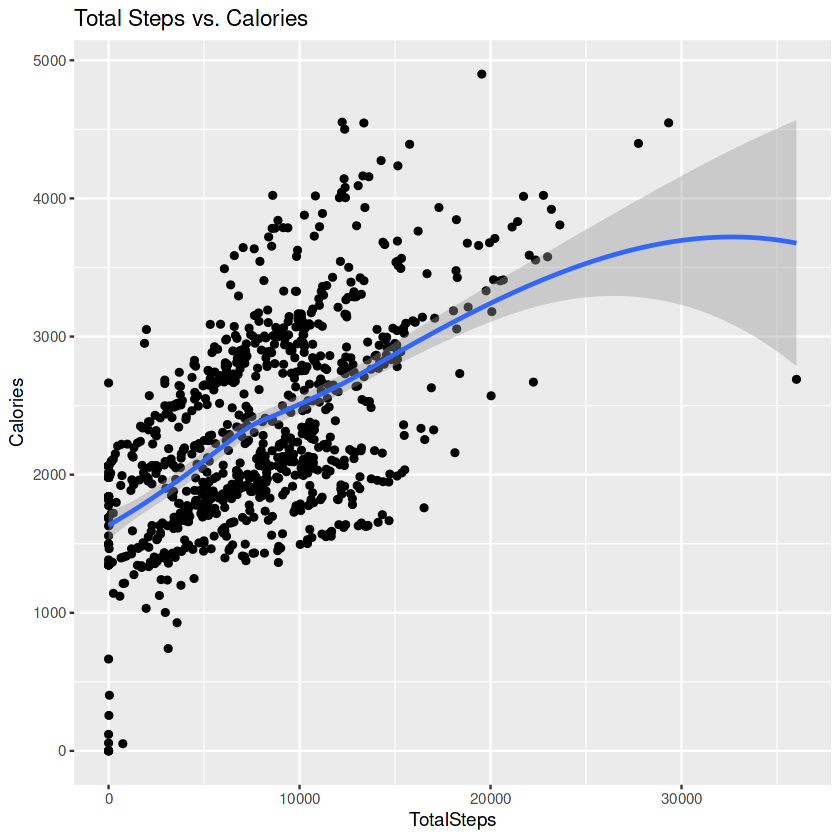

In [8]:
# Visualization on activity dataset: Total Steps vs. Calories

ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + 
  geom_smooth() + 
  labs(title="Total Steps vs. Calories")

The graph reveals that when people take more steps, they tend to burn more calories. (Positive correlation)

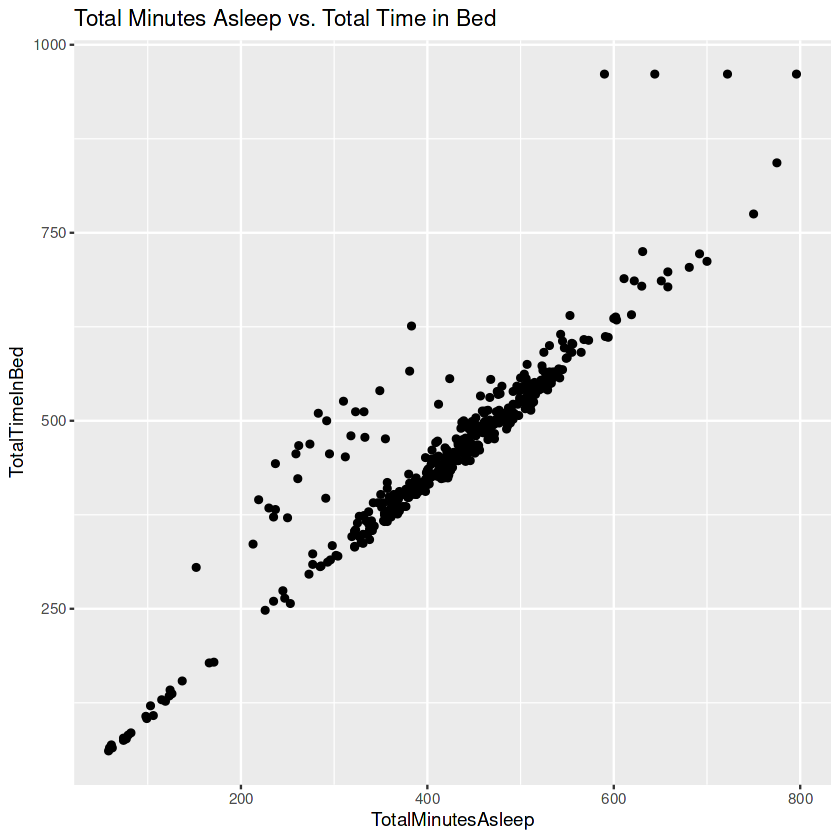

In [9]:
# Visualization on sleep dataset: Total Minutes Asleep vs. Total Time in Bed

ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ 
  labs(title="Total Minutes Asleep vs. Total Time in Bed")

The connection between Total Minutes Asleep and Total Time in Bed appears to be a linear. If Bellabeat users aim to enhance their sleep, it might be effective to employ notifications to remind them when to go to sleep.

Warning message in geom_histogram(stat = "identity", fill = "brown"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


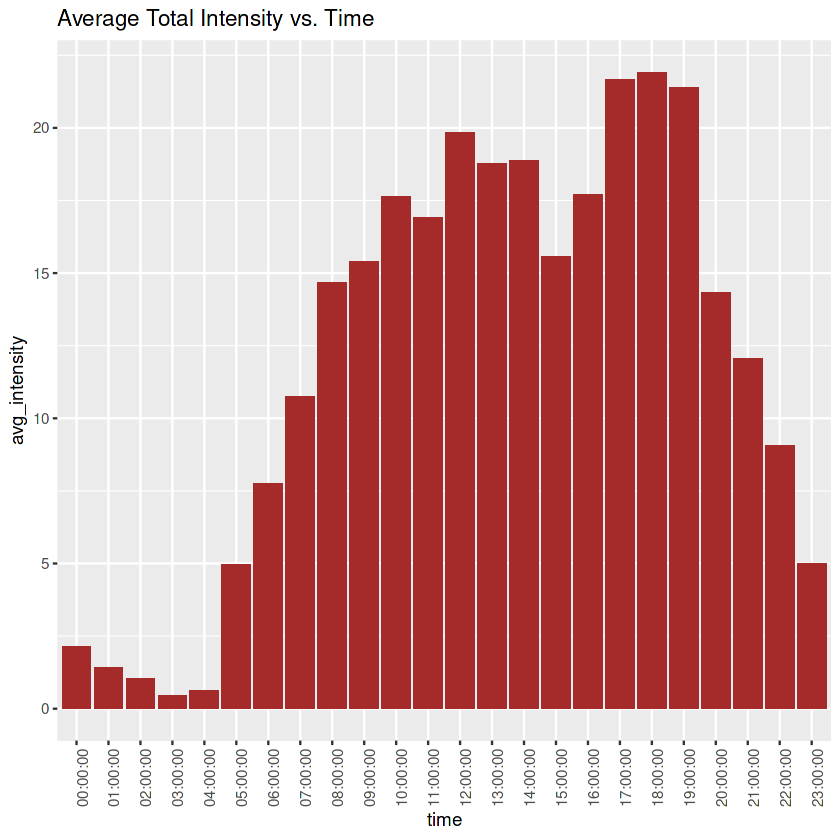

In [10]:
#created new_intensity dataset: time vs average total intensity

new_intensity <- intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(avg_intensity = mean(TotalIntensity))

#visualization 
ggplot(data=new_intensity, aes(x=time, y=avg_intensity)) + 
geom_histogram(stat = "identity", fill='brown') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

- People tend to be more active from 5am to 10pm.
- The majority of activity occurs between 5pm and 7pm.(Users could be engaging in a variety of activities, such as exercising, walking,or gym)

# Phase 6: Act

Based on the trends and insights we've gathered, here are potential opportunities for growth and recommendations for Bellabeat's marketing strategy:

1. **Addressing Sedentary Behavior:** The high average duration of sedentary behavior highlights a significant opportunity for Bellabeat to help users reduce prolonged inactivity. Creating features that remind users to move, stretch, or take short breaks could improve overall health and well-being.

2. **Cater to Lightly Active Users:** Since the majority of participants are lightly active, Bellabeat can tailor its products and marketing messages to this segment. Emphasizing how its products can seamlessly integrate into their daily routines and motivate them to stay active could attract and retain more users.

4. **Optimize Activity Goals:** With the average total steps per day around 7638, Bellabeat could encourage users to achieve health benefits by setting achievable step goals in the range of 8,000 to 12,000 steps per day. This aligns with research on improving health outcomes through physical activity.

5. **Sedentary Minutes vs. Sleep:** Address the negative correlation between sedentary minutes and sleep time by promoting the importance of an active lifestyle for better sleep. Position Bellabeat's products as tools to help users break sedentary habits and improve sleep patterns simultaneously.

6. **Caloric Burn Visualization:** Leverage the observed positive correlation between steps and calories burned. Bellabeat can create features that visually demonstrate the relationship, motivating users to increase their steps and better understand the impact on their calorie expenditure.

7. **Enhance Sleep Tracking:** Since the connection between Total Minutes Asleep and Total Time in Bed appears linear, Bellabeat can capitalize on this by providing users with insights and notifications on optimizing their sleep duration. Reminders to maintain consistent sleep schedules could be beneficial.

8. **Target Active Hours:** Given the trend of heightened activity from 5 AM to 10 PM, Bellabeat's marketing efforts can focus on engaging users during these times. Tailored content, challenges, and reminders about active habits could be particularly effective.

9. **Evening Activity Engagement:** The peak activity period from 5 PM to 7 PM presents an opportunity for Bellabeat to encourage users to make the most of this time. Promoting features related to evening exercises, relaxation routines, or active hobbies could resonate with users' preferences.

#### Thank you for engaging with the analysis!